# 02 - Clustering listings by geographical location
In this notebook, the goal is to find clusters of AirBnB listings which are close in geographical location.

### Task 01 - Load the data
In the code block below, first import the `pandas` package, then read `week9_airbnb_listings.csv` in to create a `DataFrame` named `df_listings`. 

Finally, print the `columns` of `df_listings` and consider/discuss which columns you think could be used to group listings by geographical location.

In [1]:
import pandas as pd 
df_listings = pd.read_csv("./src/week9_airbnb_listings.csv")
print(df_listings.columns) 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Group listings by neighbourhood
One simple way to group listings by geographical location would be to use the values in the `neighbourhood_cleansed` column of `df_listings`. Let's try to visualise what that would look like by positioning each listing in a scatter plot using its values in the `longitude` and `latitude` columns of `df_listings` and then using the values in `neighbourhood_cleansed` to colour each datapoint.

### Task 02 - Visualise the geographical locations of listings
Use what you learned in `01 - Clustering random data and clustering`, to create a scatter plot showing the datapoints in `X_data` coloured by the values in `y_labels`. To make things easier, we have provided the code for creating `X_data` and `y_labels`. Set the figure size to be `(18,6)` and title the figure "AirBnB listings in London - coloured by neighbourhood".

In [2]:
df_listings[['longitude','latitude','neighbourhood_cleansed']].head()

,longitude,latitude,neighbourhood_cleansed
0,-0.11169,51.49967,Lambeth
1,-0.11884,51.51122,Westminster
2,0.08801,51.49921,Greenwich
3,-0.10987,51.42432,Lambeth
4,-0.16479,51.47294,Wandsworth


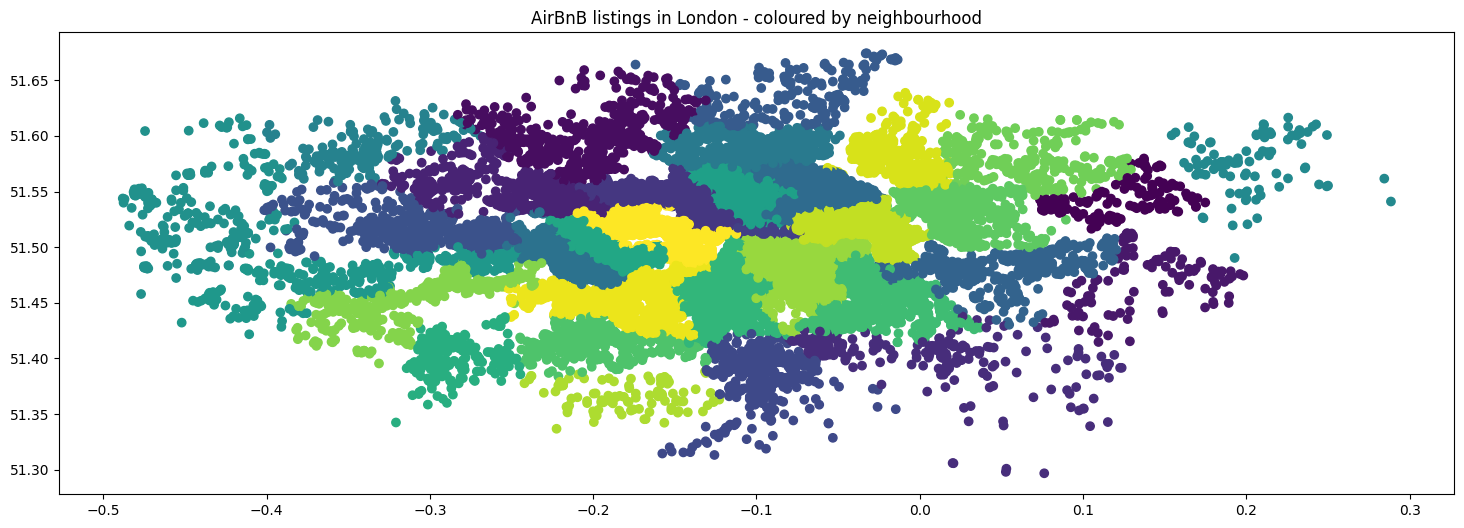

In [3]:
import matplotlib.pyplot as plt

X_data = df_listings[['longitude','latitude']].values
y_labels = df_listings['neighbourhood_cleansed'].astype('category').cat.codes

plt.figure(figsize=(18,6)) 
plt.scatter(X_data[:,0],X_data[:,1],c=y_labels)
plt.title("AirBnB listings in London - coloured by neighbourhood") 
plt.show() 


## Group listings by longitude and latitude
Now we are going to use `KMeans` to cluster the listings by the values in the `longitude` and `latitude` columns of `df_listings`. First we need to decide how many clusters to find. For simplicity, we are going to set the number of clusters to be equal to the number of unique neighbourhoods in the dataset.

### Task 03 - Specify the number of clusters
Create a variable named `n_clusters` whose value is equal to the number of unique neighbourhoods in `df_listings`. 

*Hint*: Use `df_listings['neighbourhood_cleansed'].unique()` to create an array containing the unique values found in `df_listings['neighbourhood_cleansed']`, then use the `len()` function to compute its length.

*Note*: If you are stuck, then set `n_clusters` to be any number you think is a reasonable guess based on the "AirBnB listings in London - coloured by neighbourhood" plot we created above.

In [4]:
n_clusters = len(df_listings['neighbourhood_cleansed'].unique())
n_clusters 

33

### Task 04 - Use `KMeans`  to cluster by (lon,lat)
Import `KMeans` from `sklearn.cluster`. Then use `KMeans` to fit a *k*-means model to the data `X_data` (with the number of clusters set to the value `n_clusters` you specified above), use the model to predict the cluster labels for each datapoint, and store these labels in an array named `y_predicted`.

*Note*: you can fit and predict in one step using the `fit_predict` method of `KMeans`, and all the code you need is in the previous notebook.

In [5]:
from sklearn.cluster import KMeans

y_predicted = KMeans(n_clusters=33).fit_predict(X_data) 

Now create a scatter plot showing the datapoints in `X_data` coloured by the values in `y_predicted`. Set the figure size to be `(18,6)` and title the figure "AirBnB listings in London - coloured by geographical cluster".

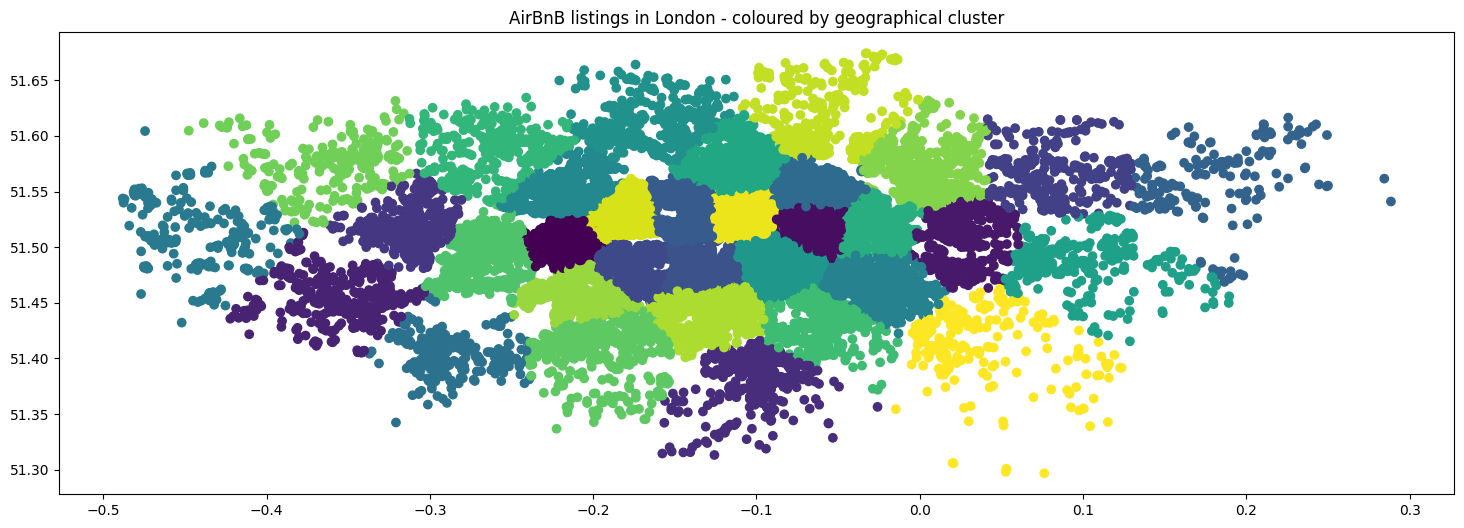

In [6]:
plt.figure(figsize=(18,6)) 
plt.scatter(X_data[:,0],X_data[:,1],c=y_predicted) 
plt.title("AirBnB listings in London - coloured by geographical cluster") 
plt.show() 


### Task 05 - Use `AgglomerativeClustering`  to cluster by (lon,lat)
As an alternative, we are going to quickly try using [Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) instead of *k*-means. Instead of specifying the number of clusters, we are going to specify a distance threshold above which, clusters will not be merged.

Simply run the code below. Hierarchical clustering can be slow to run sometimes. If it takes too long, then move on.

In [8]:
from sklearn.cluster import AgglomerativeClustering
y_predicted_AC = AgglomerativeClustering((n_clusters=None, distance_threshold=0.1).fit(X_data).labels_
plt.figure(figsize=(18,6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_predicted_AC)
plt.title("AirBnB listings in London - coloured by geographical AC cluster")
plt.show()

: 

In [7]:
print(f"X_data shape: {X_data.shape}")
print(f"X_data memory usage: {X_data.nbytes / 1024 / 1024:.2f} MB")


X_data shape: (30000, 2)
X_data memory usage: 0.46 MB
